# Multi-variate Rregression Metamodel with DOE based on random sampling
* Input variable space should be constructed using random sampling, not classical factorial DOE
* Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
* R-square fit can often be misleding measure in case of high-dimensional regression
* Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero

#### LASSO: Least Absolute Shrinkage and Selection Operator
$$ {\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\sum _{i=1}^{N}(y_{i}-\beta _{0}-x_{i}^{T}\beta )^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}|\beta _{j}|\leq t.} $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generate random (equivalent to Latin Hypercube sampling done in Optislang) feature vectors

In [5]:
X = np.array(10*np.random.randn(37,5))
X

array([[ 2.46197521e+00, -2.42971245e+01,  4.71790133e+00,
         1.60272439e+01, -5.60642984e+00],
       [-1.53811130e+01, -1.99140879e+01, -5.69612720e-01,
         8.16620104e-01, -6.53932938e+00],
       [ 4.03558474e+00, -4.00140838e+00,  4.52207064e+00,
        -1.37655730e+01,  2.08732281e+01],
       [ 5.66567535e+00,  1.08093374e+01,  1.95340253e+01,
         1.62011212e+01, -1.15026442e+00],
       [-4.07841731e+00,  6.70759454e+00,  3.69096858e+00,
         2.15392854e+00, -2.36603947e+00],
       [ 5.59506482e+00,  1.70435165e+01, -1.53778894e+01,
         1.02897402e+00,  4.60540672e+00],
       [ 1.88263412e+01,  8.97623283e-01,  3.36450850e-01,
        -1.42472284e+01, -8.42640373e-01],
       [-1.15644342e+01, -2.39927329e+01,  8.49808593e+00,
        -5.06610464e+00, -7.48228049e+00],
       [ 5.92276589e+00, -6.82258461e+00,  3.00315987e+00,
        -1.27125488e+01, -8.15220262e-01],
       [-1.34400277e+01, -4.52262999e+00, -1.02821087e+01,
        -1.18626570e+01

In [7]:
df = pd.DataFrame(data=X, columns=['Feature'+str(l) for l in range(1,6)])
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5
0,2.461975,-24.297125,4.717901,16.027244,-5.606430
1,-15.381113,-19.914088,-0.569613,0.816620,-6.539329
2,4.035585,-4.001408,4.522071,-13.765573,20.873228
3,5.665675,10.809337,19.534025,16.201121,-1.150264
4,-4.078417,6.707595,3.690969,2.153929,-2.366039


### Plot the random distributions of input features

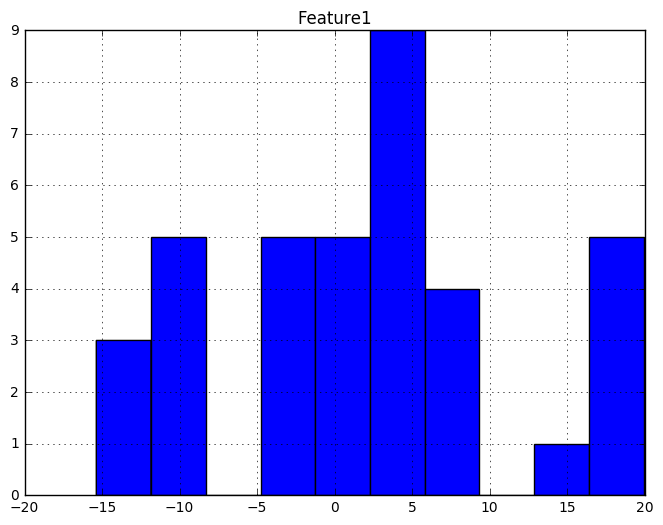

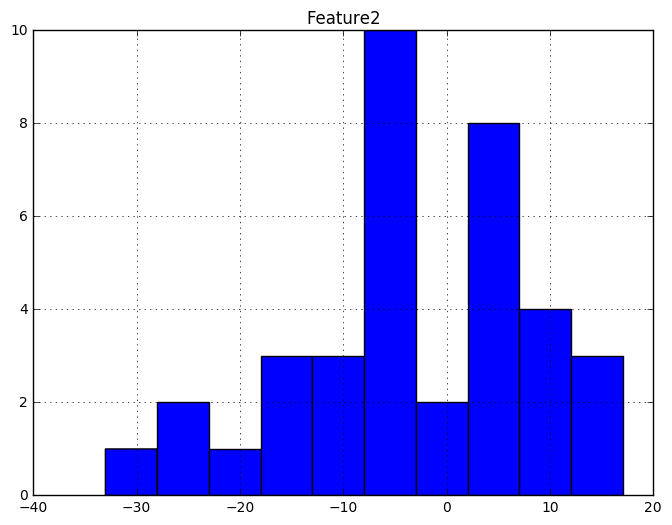

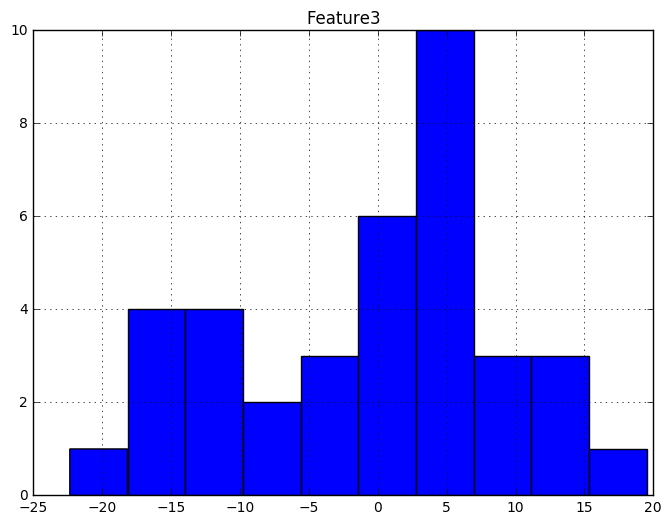

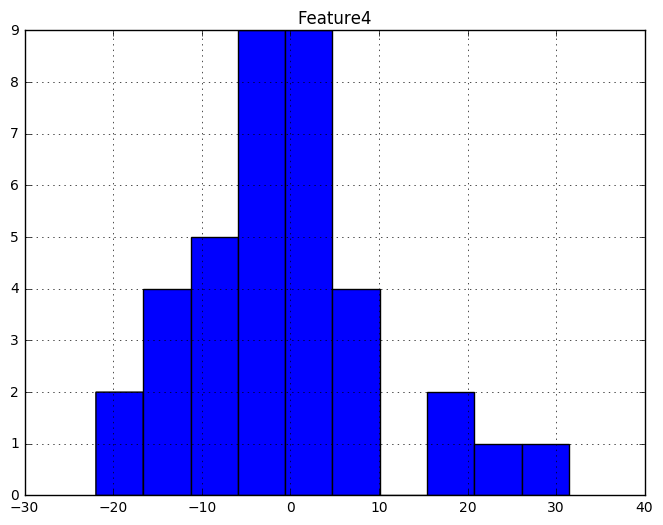

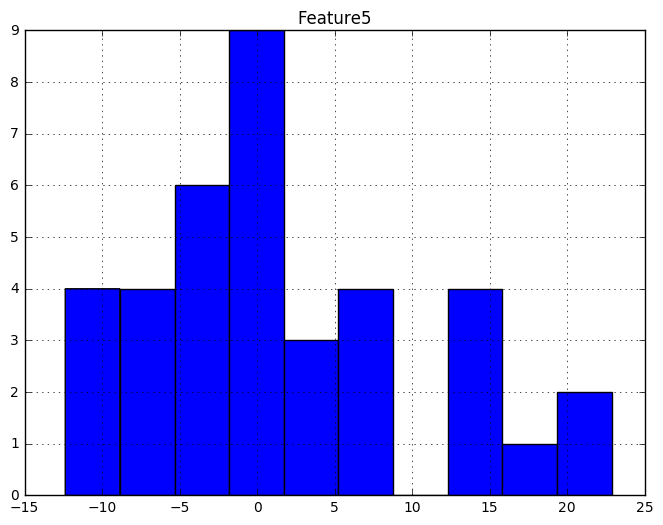

In [10]:
for i in df.columns:
    df.hist(column=i, figsize=(8,6))

### Generate the output variable by analytic function + Gaussian noise (our goal will be to *'learn'* this function)
#### Let's construst the ground  truth  or  originating  function  as  follows: 
 
$$ y=f(x_1,x_2,x_3,x_4,x_5)= 5x_1^2+13x_2+0.1x_1x_3^2+2x_4x_5+0.1x_5^3+0.8x_1x_4x_5+\psi(x)\ :\ \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

In [11]:
df['y'] = 5*df['Feature1']**2 + 13*df['Feature2'] + 0.1*df['Feature1']*df['Feature3']**2 + 2*df['Feature4']*df['Feature5'] \
+ 0.1*df['Feature5']**3 + 0.8*df['Feature1']*df['Feature4']*df['Feature5'] +  30*np.random.normal(loc=5, scale=2)

In [13]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,2.461975,-24.297125,4.717901,16.027244,-5.606430,-498.290920
1,-15.381113,-19.914088,-0.569613,0.816620,-6.539329,1106.672930
2,4.035585,-4.001408,4.522071,-13.765573,20.873228,-399.116553
3,5.665675,10.809337,19.534025,16.201121,-1.150264,551.417056
4,-4.078417,6.707595,3.690969,2.153929,-2.366039,326.017063


### Plot single-variable scatterplots

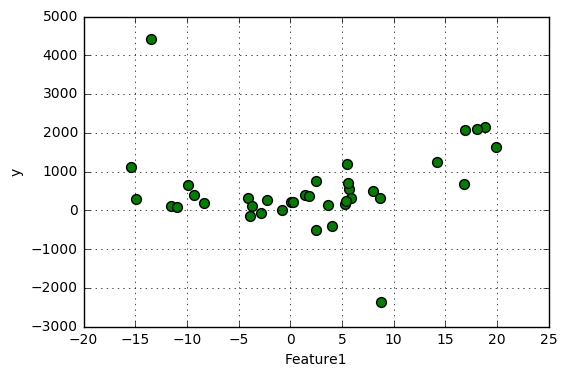

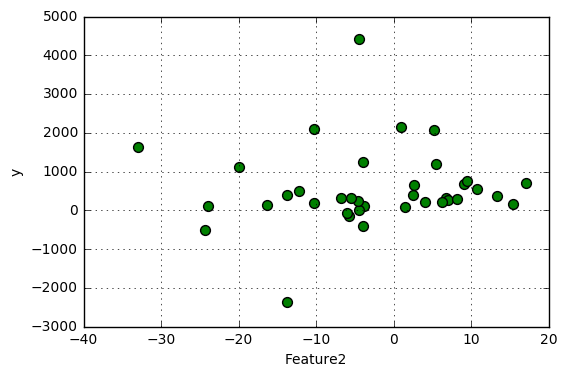

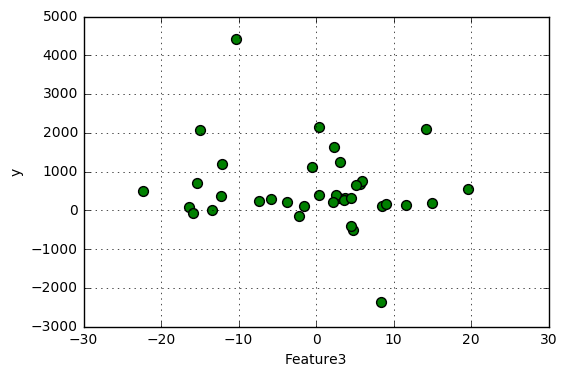

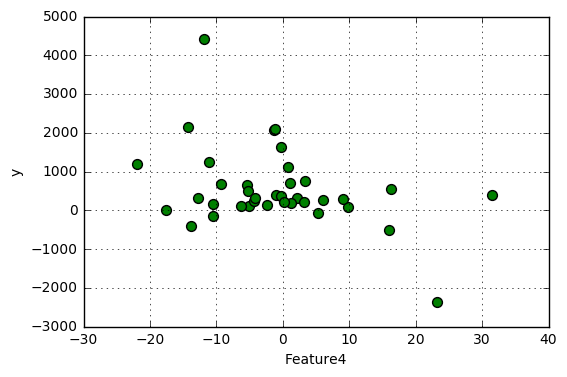

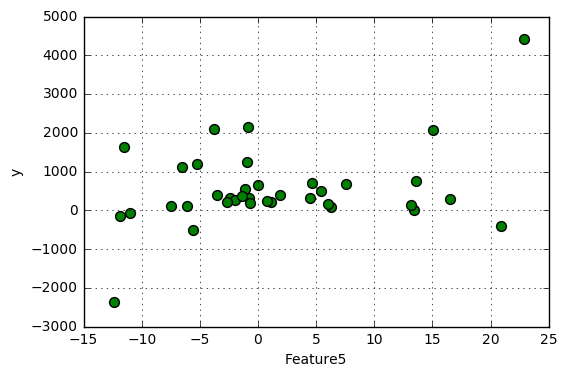

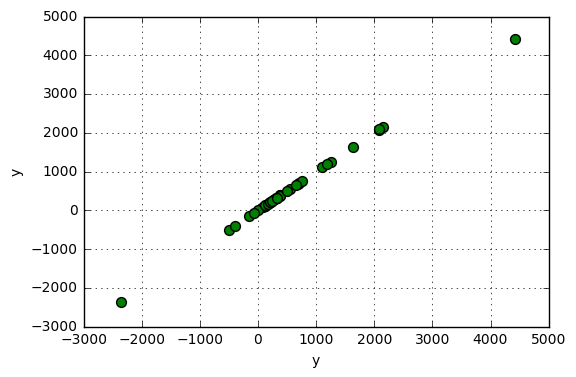

In [22]:
for i in df.columns:
    df.plot.scatter(i, 'y', c='g', s=50, grid=True)

### Standard linear regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True)

In [25]:
X_linear = df.drop('y', axis=1)
y_linear = df['y']

In [26]:
linear_model.fit(X=X_linear, y=y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [29]:
y_pred_linear = linear_model.predict(X_linear)
y_pred_linear

array([ -48.30513418,  119.77233883, 1504.77254151, -195.39120326,
        175.95744305,  665.61895594, 1007.73818688,  234.21987818,
        825.23537199, 1433.84472606,  376.65368814, 1270.04393037,
       1033.51079239,  300.97156661,  387.18277854,  711.5770581 ,
       1465.36786704, -470.25222039, -354.90052087,  110.97452152,
        955.54833973,  197.96320053,  804.01817803,  205.0530263 ,
        451.82069198,  548.76553715,  389.32265348,  475.73841336,
       1113.64794797,  730.97454269,  324.85011644,  866.27195717,
        984.85613127,  499.54754194,  479.74682601,   75.12138686,
        785.91901937])

### R-square of simple linear fit is very bad, coefficients have no meaning i.e. we did not 'learn' the function

In [30]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear - y_linear)))
RMSE_linear

5437.846729998126

In [32]:
linear_model.coef_

array([ 12.58506949,  -5.58241914,  -8.8863319 , -26.32580247,
        32.49712884])

In [31]:
coeff_linear = pd.DataFrame(data=linear_model.coef_, index=df.drop('y', axis=1).columns, columns=['Linear model coeff'])
coeff_linear

,Linear model coeff
Feature1,12.585069
Feature2,-5.582419
Feature3,-8.886332
Feature4,-26.325802
Feature5,32.497129


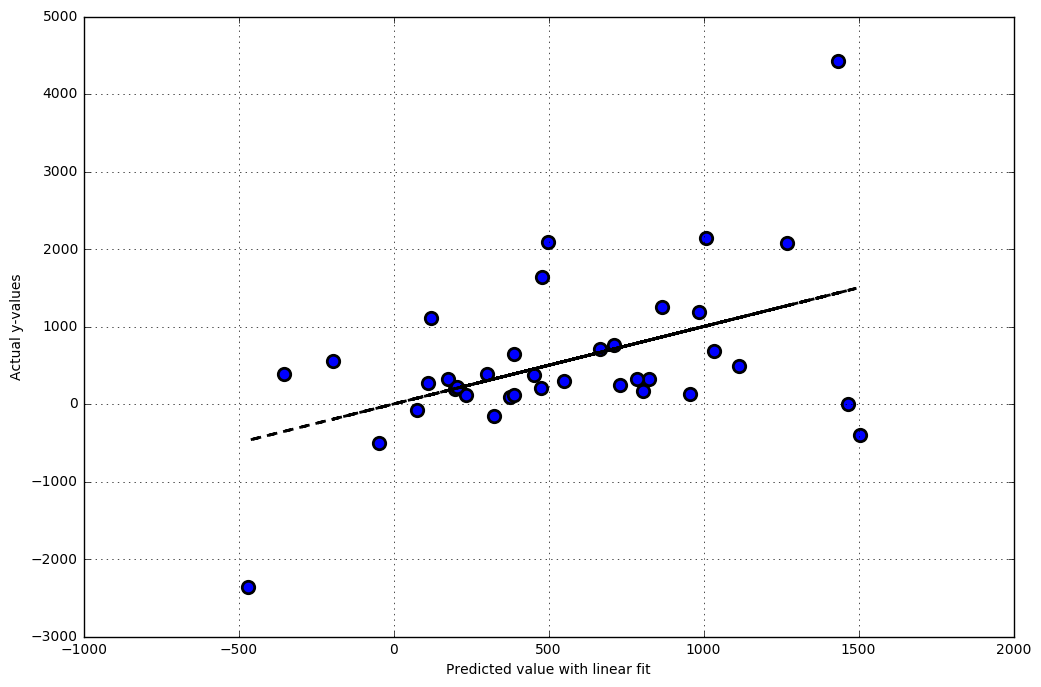

In [35]:
plt.figure(figsize=(12,8))
plt.xlabel('Predicted value with linear fit')
plt.ylabel('Actual y-values')
plt.grid(True)
plt.scatter(y_pred_linear, y_linear, s=80, lw=2)
plt.plot(y_pred_linear, y_pred_linear, 'k--', lw=2)

### Create polynomial features

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

In [40]:
X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature1^2', 'Feature1 Feature2', 'Feature1 Feature3', 'Feature1 Feature4', 'Feature1 Feature5', 'Feature2^2', 'Feature2 Feature3', 'Feature2 Feature4', 'Feature2 Feature5', 'Feature3^2', 'Feature3 Feature4', 'Feature3 Feature5', 'Feature4^2', 'Feature4 Feature5', 'Feature5^2', 'Feature1^3', 'Feature1^2 Feature2', 'Feature1^2 Feature3', 'Feature1^2 Feature4', 'Feature1^2 Feature5', 'Feature1 Feature2^2', 'Feature1 Feature2 Feature3', 'Feature1 Feature2 Feature4', 'Feature1 Feature2 Feature5', 'Feature1 Feature3^2', 'Feature1 Feature3 Feature4', 'Feature1 Feature3 Feature5', 'Feature1 Feature4^2', 'Feature1 Feature4 Feature5', 'Feature1 Feature5^2', 'Feature2^3', 'Feature2^2 Feature3', 'Feature2^2 Feature4', 'Feature2^2 Feature5', 'Feature2 Feature3^2', 'Feature2 Feature3 Feature4', 'Feature2 Feature3 Feature5', 'Feature2 Feature4^2', 'Feature2 Feature4 Feature5', 'Feature2 Feature5^2', 'Feature3^3', 'Feature3^2 Feature4', 'F

In [41]:
df_poly = pd.DataFrame(data=X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^3,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3
0,2.461975,-24.297125,4.717901,16.027244,-5.606430,6.061322,-59.818918,11.615356,39.458677,-13.802891,...,105.013846,356.743899,-124.791240,1211.899333,-423.929942,148.293337,4116.958965,-1440.137914,503.769221,-176.221614
1,-15.381113,-19.914088,-0.569613,0.816620,-6.539329,236.578638,306.300837,8.761278,-12.560526,100.582164,...,-0.184816,0.264959,-2.121742,-0.379857,3.041816,-24.358251,0.544578,-4.360872,34.920986,-279.640222
2,4.035585,-4.001408,4.522071,-13.765573,20.873228,16.285944,-16.148023,18.249199,-55.552136,84.235681,...,92.472378,-281.493894,426.839206,856.891691,-1299.335354,1970.228420,-2608.452208,3955.288875,-5997.545225,9094.291178
3,5.665675,10.809337,19.534025,16.201121,-1.150264,32.099877,61.242196,110.673446,91.790293,-6.517025,...,7453.757137,6181.993776,-438.915764,5127.219246,-364.027761,25.845630,4252.410815,-301.917182,21.435837,-1.521924
4,-4.078417,6.707595,3.690969,2.153929,-2.366039,16.633488,-27.356370,-15.053310,-8.784619,9.649696,...,50.282984,29.343505,-32.233145,17.123910,-18.810209,20.662569,9.992954,-10.977023,12.057999,-13.245427


In [42]:
df_poly['y'] = df['y']
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3,y
0,2.461975,-24.297125,4.717901,16.027244,-5.606430,6.061322,-59.818918,11.615356,39.458677,-13.802891,...,356.743899,-124.791240,1211.899333,-423.929942,148.293337,4116.958965,-1440.137914,503.769221,-176.221614,-498.290920
1,-15.381113,-19.914088,-0.569613,0.816620,-6.539329,236.578638,306.300837,8.761278,-12.560526,100.582164,...,0.264959,-2.121742,-0.379857,3.041816,-24.358251,0.544578,-4.360872,34.920986,-279.640222,1106.672930
2,4.035585,-4.001408,4.522071,-13.765573,20.873228,16.285944,-16.148023,18.249199,-55.552136,84.235681,...,-281.493894,426.839206,856.891691,-1299.335354,1970.228420,-2608.452208,3955.288875,-5997.545225,9094.291178,-399.116553
3,5.665675,10.809337,19.534025,16.201121,-1.150264,32.099877,61.242196,110.673446,91.790293,-6.517025,...,6181.993776,-438.915764,5127.219246,-364.027761,25.845630,4252.410815,-301.917182,21.435837,-1.521924,551.417056
4,-4.078417,6.707595,3.690969,2.153929,-2.366039,16.633488,-27.356370,-15.053310,-8.784619,9.649696,...,29.343505,-32.233145,17.123910,-18.810209,20.662569,9.992954,-10.977023,12.057999,-13.245427,326.017063


In [43]:
X_train = df_poly.drop('y', axis=1)
y_train = df_poly['y']

### Polynomial model without regularization and cross-validation

In [44]:
poly = LinearRegression(normalize=True)
poly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [45]:
model_poly = poly.fit(X=X_train, y=y_train)
y_poly = poly.predict(X=X_train)
RMSE_poly = np.sqrt(np.sum(np.square(y_poly - y_train)))
RMSE_poly

7.078674798722691e-12

In [46]:
coef_poly = pd.DataFrame(data=model_poly.coef_, index=df_poly.drop('y', axis=1).columns, columns=['Coef polynomial model'])
coef_poly

,Coef polynomial model
Feature1,-2.270879
Feature2,11.647245
Feature3,-1.933657
Feature4,-3.369156
Feature5,-0.215197
Feature1^2,3.257559
Feature1 Feature2,0.404354
Feature1 Feature3,-0.745560
Feature1 Feature4,-0.397840
Feature1 Feature5,-0.256511


#### R-square value of the simple polynomial model is perfect but the model is flawed as shown above i.e. it learned wrong coefficients and overfitted the to the data

In [47]:
model_poly.score(X=X_train,y=y_train)

1.0

### Metamodel (Optislang style :) - polynomial model with cross-validation and LASSO regularization
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
model1 = LassoCV(cv=10, verbose=0, normalize=True, eps=0.001, n_alphas=100, tol=0.0001, max_iter=5000)
model1

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=5000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=0)

In [50]:
model1.fit(X=X_train, y=y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=5000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=0)

In [51]:
y_pred1 = np.array(model1.predict(X_train))
RMSE_1 = np.sqrt(np.sum(np.square(y_pred1 - y_train)))
RMSE_1

13.097574751072614

In [52]:
coef1 = pd.DataFrame(data=model1.coef_, index=df_poly.drop('y', axis=1).columns, columns=['Coef Metamodel'])
coef1

,Coef Metamodel
Feature1,0.000000
Feature2,12.865856
Feature3,-0.000000
Feature4,-0.000000
Feature5,0.000000
Feature1^2,4.993129
Feature1 Feature2,-0.000000
Feature1 Feature3,-0.000000
Feature1 Feature4,-0.000000
Feature1 Feature5,-0.000000


In [53]:
model1.score(X=X_train, y=y_train)

0.9999955067599391

In [54]:
model1.alpha_

0.12525642873020842

#### Recall that the ground  truth  or  originating  function  is  as  follows: 
 
$$ y=f(x_1,x_2,x_3,x_4,x_5)= 5x_1^2+13x_2+0.1x_1x_3^2+2x_4x_5+0.1x_5^3+0.8x_1x_4x_5+\psi(x) $$

### Printing only the non-zero coefficients of the *metamodel*

In [55]:
coef1[coef1['Coef Metamodel']!=0]

,Coef Metamodel
Feature2,12.865856
Feature1^2,4.993129
Feature4 Feature5,1.976911
Feature1^2 Feature5,0.000728
Feature1 Feature3^2,0.099281
Feature1 Feature4 Feature5,0.799046
Feature2 Feature4^2,0.000827
Feature2 Feature5^2,0.000044
Feature5^3,0.099186


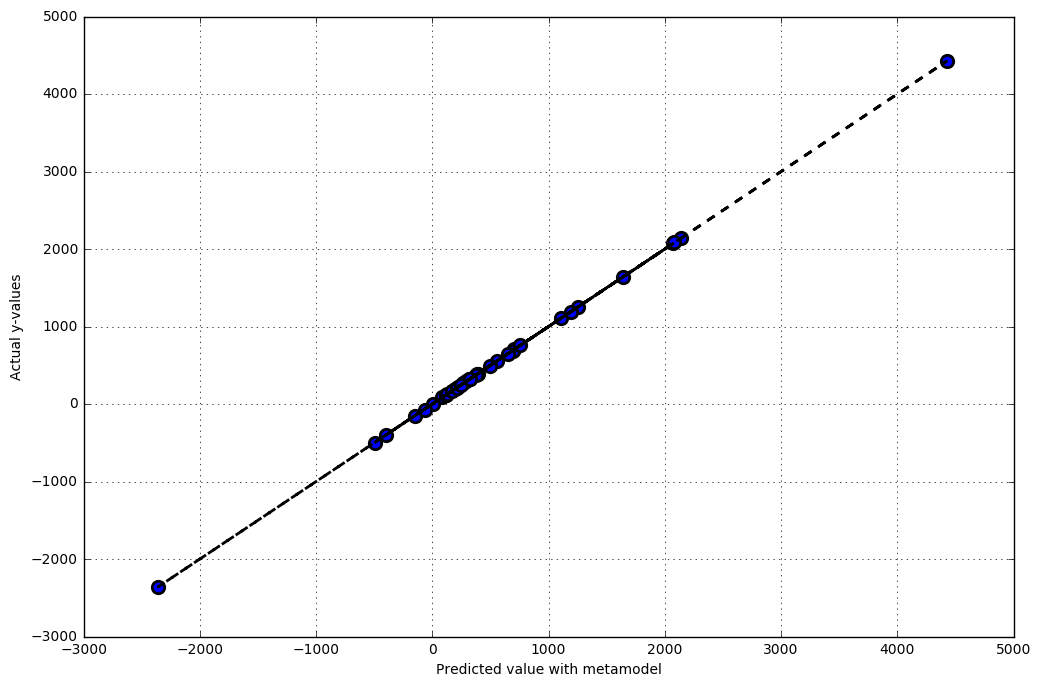

In [56]:
plt.figure(figsize=(12,8))
plt.xlabel('Predicted value with metamodel')
plt.ylabel('Actual y-values')
plt.grid(True)
plt.scatter(x=y_pred1, y=y_train, s=80, lw=2)
plt.plot(y_pred1, y_pred1, 'k--', lw=2)

(-2.0978000250814457,
 0.9021999749185543,
 0.3925982085701938,
 4842395.835658363)

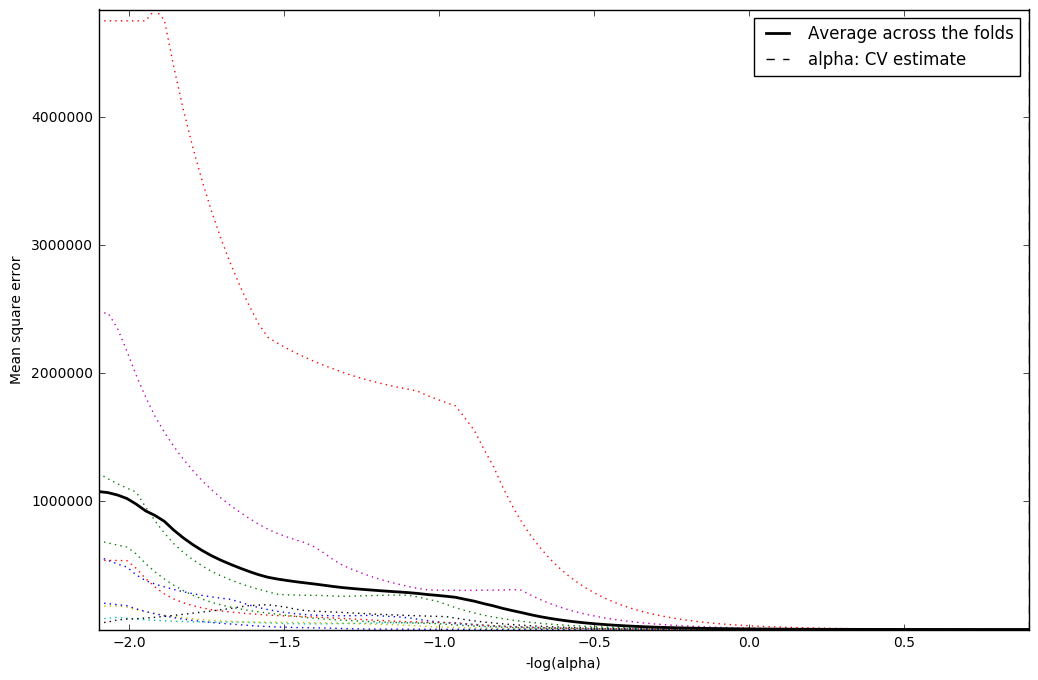

In [58]:
# Display results
m_log_alphas = -np.log10(model1.alphas_)

plt.figure(figsize=(12,8))
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k', label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')